<a href="https://colab.research.google.com/github/GhostPowerShell/AIDE-0.17.4/blob/main/optimization-and-algorithms/labs/lab1/solution/lab1_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np

Set parametrs

In [5]:
UNIT_VARIABLE_COST = 48
UNIT_PRICE = 65
FIXED_OVERHEAD = 42000
SEASONALITY = {
    'Q1': 1.2,
    'Q2': 0.7,
    'Q3': 0.8,
    'Q4': 1.3
}
PREVIOUS_Q4_ADVERTISING = 50000

Core main functions

In [6]:
def calculate_sales(advertising, season):
    """
    Calculates sales based on advertising budget and season:
    """
    base_sales = 2000 + 35 * math.sqrt(advertising)
    return base_sales * SEASONALITY[season]

def calculate_sales_with_residual(current_advertising, previous_advertising, season):
    """
    Calculates sales volume taking into account the residual effect of advertising:
    """
    effective_advertising = 0.7 * current_advertising + 0.3 * previous_advertising
    base_sales = 2000 + 35 * math.sqrt(effective_advertising)
    return base_sales * SEASONALITY[season]

def calculate_profit(advertising, sales):
    """
    Calculates profit based on advertising budget and sales volume:
    """
    revenue = sales * UNIT_PRICE
    cost_of_sales = sales * UNIT_VARIABLE_COST
    gross_margin = revenue - cost_of_sales
    profit = gross_margin - advertising - FIXED_OVERHEAD
    return profit

def calculate_annual_profit(advertising_budgets):
    """
    Calculates annual profit based on advertising budgets by quarter:
    """
    total_profit = 0
    prev_ad = PREVIOUS_Q4_ADVERTISING
    for quarter, ad in zip(['Q1', 'Q2', 'Q3', 'Q4'], advertising_budgets):
        sales = calculate_sales_with_residual(ad, prev_ad, quarter)
        profit = calculate_profit(ad, sales)
        total_profit += profit
        prev_ad = ad
    return total_profit

Optimization functions

In [7]:
def optimize_single_quarter(quarter, start=0, end=200000, step=1000):
    """
    Calculates annual profit based on advertising budgets by quarter.
    """
    best_profit = float('-inf')
    best_advertising = 0
    for advertising in range(start, end + 1, step):
        sales = calculate_sales(advertising, quarter)
        profit = calculate_profit(advertising, sales)
        if profit > best_profit:
            best_profit = profit
            best_advertising = advertising
    return best_advertising, best_profit

def optimize_annual_advertising(total_budget, step=1000):
    """
    Optimizes the allocation of the annual advertising budget by quarters.
    """
    best_profit = float('-inf')
    best_allocation = None

    for q1 in range(0, total_budget + 1, step):
        for q2 in range(0, total_budget - q1 + 1, step):
            for q3 in range(0, total_budget - q1 - q2 + 1, step):
                q4 = total_budget - q1 - q2 - q3

                allocation = [q1, q2, q3, q4]
                total_profit = calculate_annual_profit(allocation)

                if total_profit > best_profit:
                    best_profit = total_profit
                    best_allocation = allocation

    return best_allocation, best_profit

Visualization functions:

In [8]:
def plot_profit_vs_advertising(quarter):
    """
    Constructs a graph of profit vs. advertising budget for a given quarter:
    """
    ad_budgets = range(0, 200001, 5000)
    profits = [calculate_profit(ad, calculate_sales(ad, quarter)) for ad in ad_budgets]

    plt.figure(figsize=(10, 6))
    plt.plot(ad_budgets, profits)
    plt.title(f'Profit vs Advertising Budget (Quarter {quarter})')
    plt.xlabel('Advertising Budget ($)')
    plt.ylabel('Profit ($)')
    plt.grid(True)
    plt.show()

def plot_optimal_allocation(allocation):
    """
    Constructs a bar chart of the optimal distribution of the advertising budget by quarters:
    """
    quarters = ['Q1', 'Q2', 'Q3', 'Q4']

    plt.figure(figsize=(10, 6))
    plt.bar(quarters, allocation)
    plt.title('Optimal allocation of advertising budget')
    plt.xlabel('Quarter')
    plt.ylabel('Advertising Budget ($)')
    for i, v in enumerate(allocation):
        plt.text(i, v + 1000, f'${v}', ha='center')
    plt.show()

Main

Optimal advertising budget for Q1: $127000
Maximum profit for Q1: $126248.60


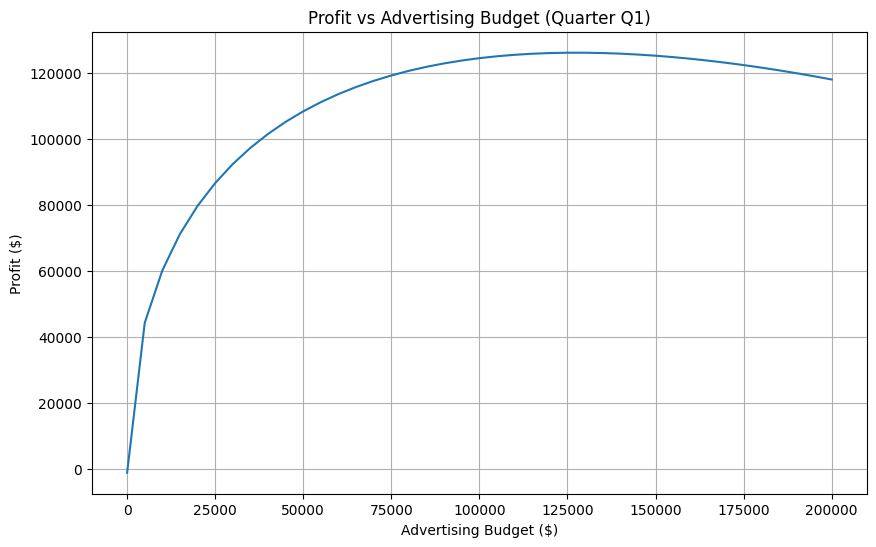

Optimal allocation of the annual budget: [190000, 0, 146000, 64000]
Maximum annual profit: $324528.57


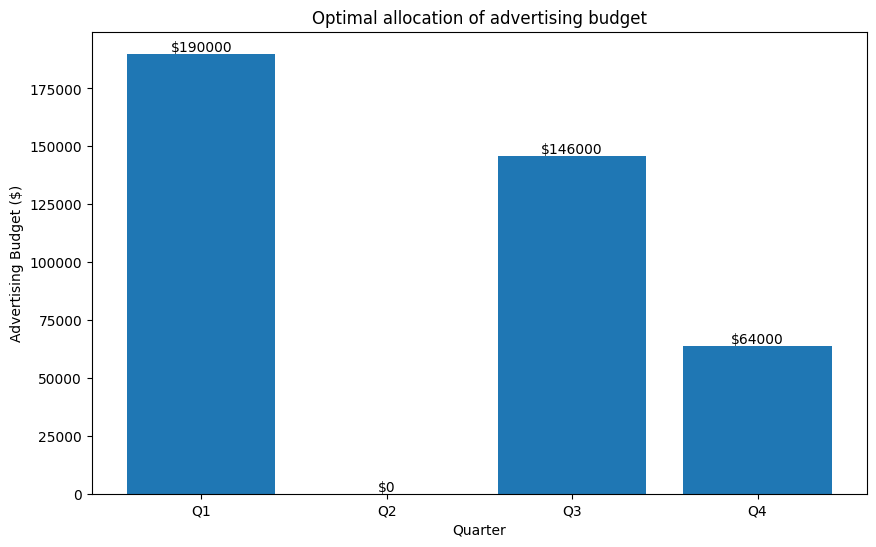

In [10]:
# Optimization for one quarter (Q1)
best_ad_q1, best_profit_q1 = optimize_single_quarter('Q1')
print(f"Optimal advertising budget for Q1: ${best_ad_q1}")
print(f"Maximum profit for Q1: ${best_profit_q1:.2f}")

# Virtualization for Q1
plot_profit_vs_advertising('Q1')

# Optimizing the annual budget
total_budget = 400000
best_allocation, best_annual_profit = optimize_annual_advertising(total_budget)
print(f"Optimal allocation of the annual budget: {best_allocation}")
print(f"Maximum annual profit: ${best_annual_profit:.2f}")

# Visualization of the optimal allocation
plot_optimal_allocation(best_allocation)